<a href="https://colab.research.google.com/github/peela85/AIML/blob/master/M1_009_PCAwithEigenFaces_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand how to derive Eigen faces using PCA
* Use the PCA features for classification purpose.

In [1]:
#@title Experiment Walkthrough
#@markdown PCA With EigenFaces
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/pca_with_eigen_faces.mp4" type="video/mp4">
</video>""")



## Dataset

### Description 

The dataset choosen for this experiment is a preprocessed excerpt of the “Labeled Faces in the Wild”, aka LFW. 

Labeled Faces in the Wild, a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector. 

## AI / ML Technique

### Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902225" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9059040698" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M1W3_009_PCAwithEigenFaces_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install imageio")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [0]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt
# Importing Sklearn Packages
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [8]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



Automatically created module for IPython interactive environment


## Download the data

In [9]:
# Loading and Downloading data from sklearn 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Storing images arrays shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

2019-05-18 04:57:40,314 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012
2019-05-18 04:57:41,364 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-05-18 04:57:42,285 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-05-18 04:57:43,406 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


### Assigning to the X i.e. data variable, by using the 'data' attribute present within lfw_people

In [0]:
X = lfw_people.data
n_features = X.shape[1]

In [11]:

# the label to predict is the id of the person
y = lfw_people.target
# Loading the target names (Label names)
target_names = lfw_people.target_names
# Checkinq How many classes are present
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)




Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### Split into a training and testing set using train_test_split sklearn function


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Performing PCA on the face images, otherwise known as Eigenfaces

### Compute the PCA

In [13]:

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
# Starting the timer
t0 = time()

# Trying to extarct PCA features using PCA function from sklearn
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# Printing the time taken to extract the features
print("done in %0.3fs" % (time() - t0))

# Storing the eigen faces
eigenfaces = pca.components_.reshape((n_components, h, w))


Extracting the top 150 eigenfaces from 966 faces
done in 0.269s


### Projecting the input data on the eigenfaces orthonormal basis


In [14]:

t0 = time()
# Transforming the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.031s


In [15]:
# Checking for the shape of the original data 
X_train.shape, X_train_pca.shape, X_test.shape, X_test_pca.shape

((966, 1850), (966, 150), (322, 1850), (322, 150))

## Train a MLP classification model


### Fitting the classifier to the training set

In [0]:

t0 = time()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30,30))


In [17]:

clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))


done in 72.042s


###  Quantitative evaluation of the model quality on the test set

In [18]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)

from sklearn.metrics import accuracy_score

print("done in %0.3fs" % (time() - t0))

print("accuracy is", accuracy_score(y_test,y_pred,normalize=True))
print("classification report")
print(classification_report(y_test, y_pred, target_names=target_names))
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
done in 0.009s
accuracy is 0.7763975155279503
classification report
                   precision    recall  f1-score   support

     Ariel Sharon       0.43      0.27      0.33        11
     Colin Powell       0.66      0.78      0.72        50
  Donald Rumsfeld       0.72      0.55      0.62        33
    George W Bush       0.83      0.93      0.88       154
Gerhard Schroeder       0.83      0.65      0.73        23
      Hugo Chavez       0.82      0.69      0.75        13
       Tony Blair       0.77      0.61      0.68        38

        micro avg       0.78      0.78      0.78       322
        macro avg       0.72      0.64      0.67       322
     weighted avg       0.77      0.78      0.77       322

confusion matrix
[[  3   4   1   2   1   0   0]
 [  1  39   1   8   0   0   1]
 [  1   6  18   8   0   0   0]
 [  1   3   4 143   0   0   3]
 [  0   1   1   4  15   1   1]
 [  0   1   0   1   0   9   2]
 [  1   5   0   6   2   1  23]]


### Qualitative evaluation of the predictions using matplotlib


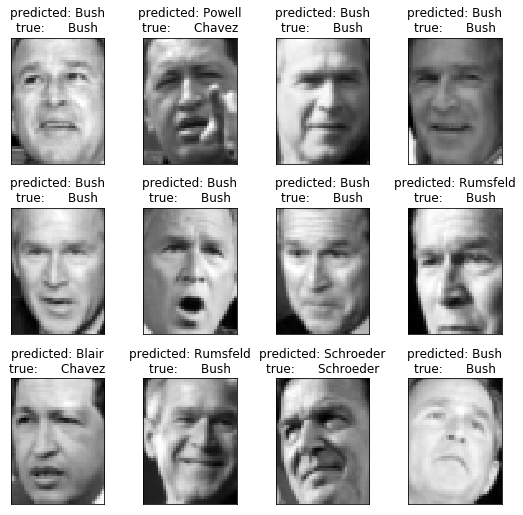

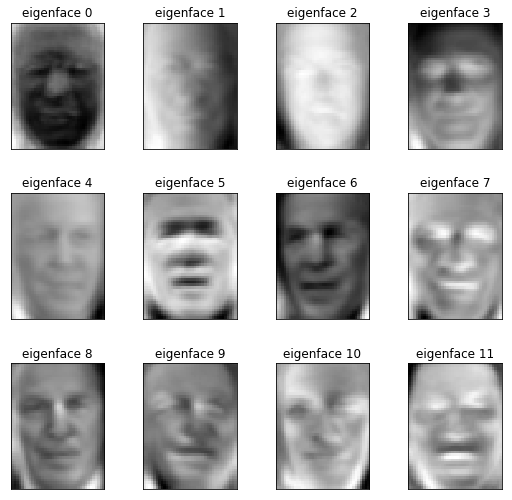

In [19]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)



#### Please answer the questions below to complete the experiment:

In [0]:
#@title The dataset LFW, contains a set of EigenFaces which we use to train our Machine Learning model?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["TRUE", "FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [24]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 12435
Date of submission:  18 May 2019
Time of submission:  10:30:40
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
